In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [176]:
## Import Data

traindata = pd.read_csv("C:\\Users\\v-jivya\\OneDrive - Microsoft\\Brillio\\DataScienceProject\\TrainData.csv")
testdata = pd.read_csv("C:\\Users\\v-jivya\\OneDrive - Microsoft\\Brillio\\DataScienceProject\\TestData.csv")


In [177]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [178]:
traindata.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [179]:
traindata.describe(include=['O'])

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [180]:
testdata.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [181]:
testdata.describe(include=['O'])

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
count,2627,2577,2603,2589,2627,2595
unique,2,2,2,9,3,7
top,Male,Yes,Yes,Artist,Low,Cat_6
freq,1424,1520,1602,802,1616,1672


In [182]:
traindata.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [183]:
testdata.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


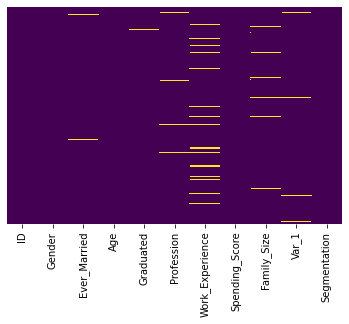

In [184]:
sns.heatmap(traindata.isnull(),yticklabels=False,cbar=False,cmap='viridis')
## Work experience has most missing values

In [185]:
traindata.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [186]:
# Explore Segmentation
## Signifies all segments are evenly spread
traindata['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

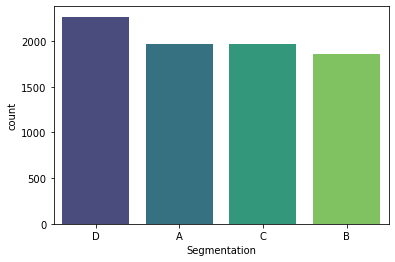

In [187]:
sns.countplot(x='Segmentation',data=traindata,palette='viridis',order=traindata['Segmentation'].value_counts().index)

In [188]:
traindata[['Gender', 'Segmentation']].groupby(['Gender'], as_index=False).count().sort_values(by='Segmentation', ascending=False)

,Gender,Segmentation
1,Male,4417
0,Female,3651


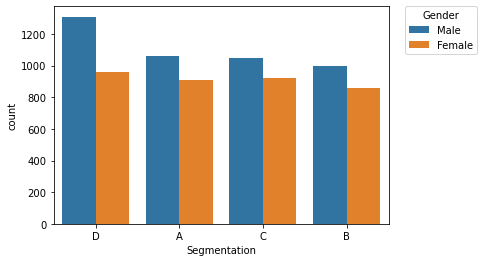

In [189]:
sns.countplot(x='Segmentation', hue='Gender',data=traindata,order=traindata['Segmentation'].value_counts().index)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Gender')

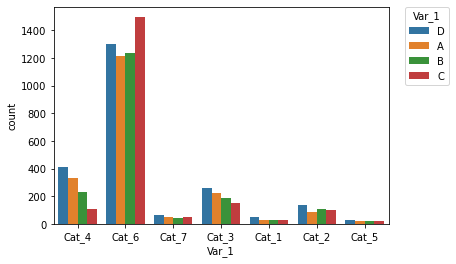

In [190]:
sns.countplot(hue='Segmentation', x='Var_1',data=traindata)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Var_1')

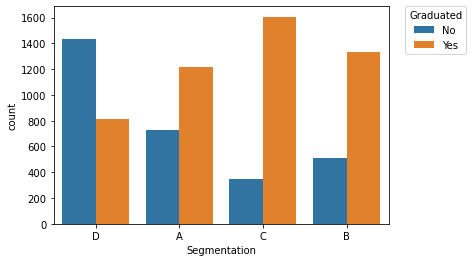

In [191]:
sns.countplot(x='Segmentation', hue='Graduated',data=traindata,order=traindata['Segmentation'].value_counts().index)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,title='Graduated')
## Segment D has more Non Graduates, while C has majority of Graduates

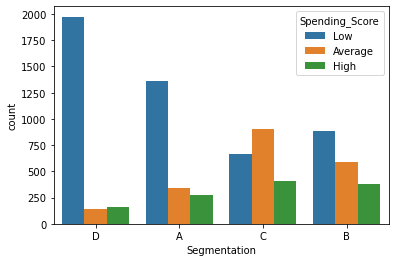

In [192]:
sns.countplot(x='Segmentation', hue='Spending_Score',data=traindata,order=traindata['Segmentation'].value_counts().index)
## Segment D has Low Spending Score , while C has Average spending

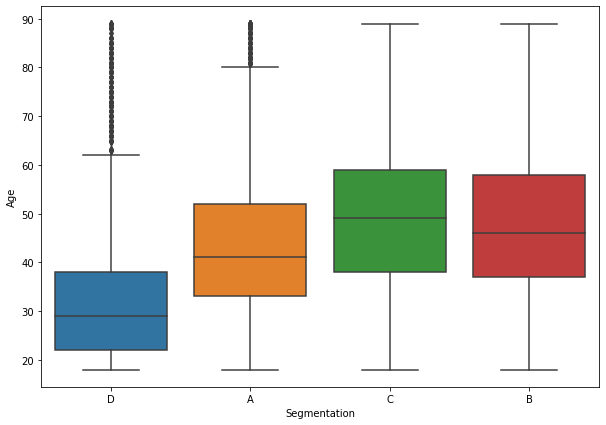

In [193]:
plt.figure(figsize=(10, 7))
sns.boxplot(y='Age',x='Segmentation',data=traindata,order=traindata['Segmentation'].value_counts().index)

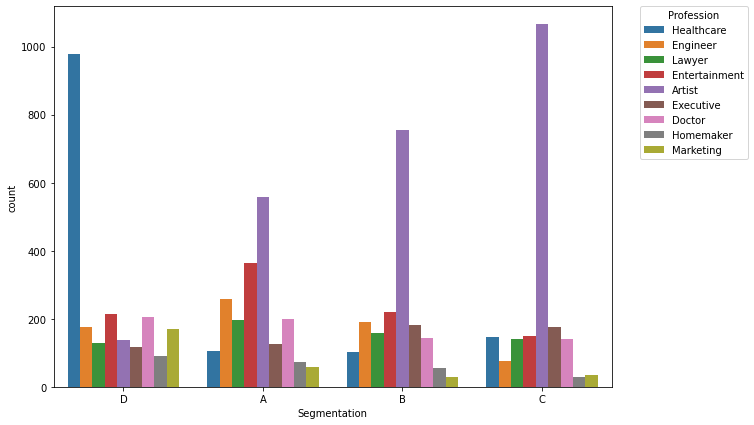

In [194]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Segmentation', hue='Profession',data=traindata)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Profession')
## Segment D has mostly healthcare professionals, while C has majorly Artist

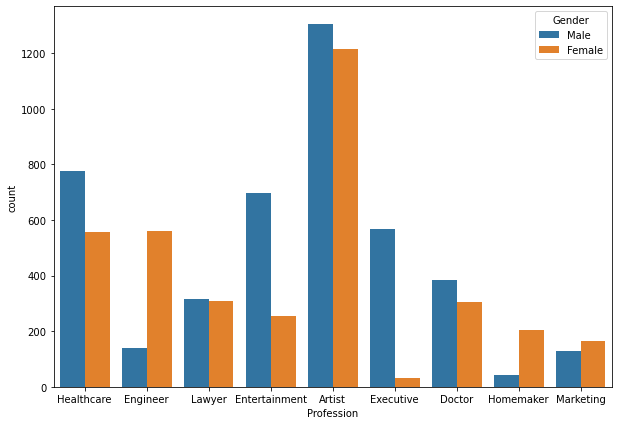

In [195]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Profession',hue='Gender',data=traindata)

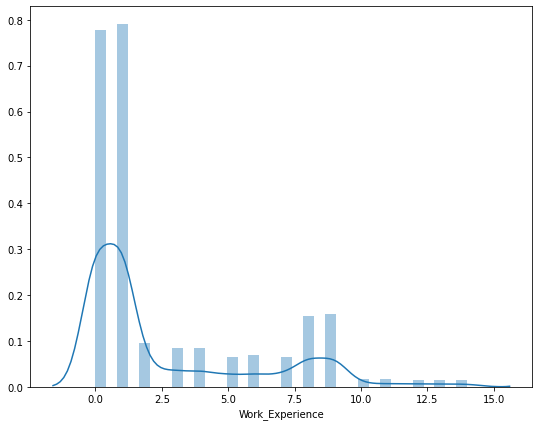

In [196]:
plt.figure(figsize=(9, 7))
sns.distplot(traindata['Work_Experience'])

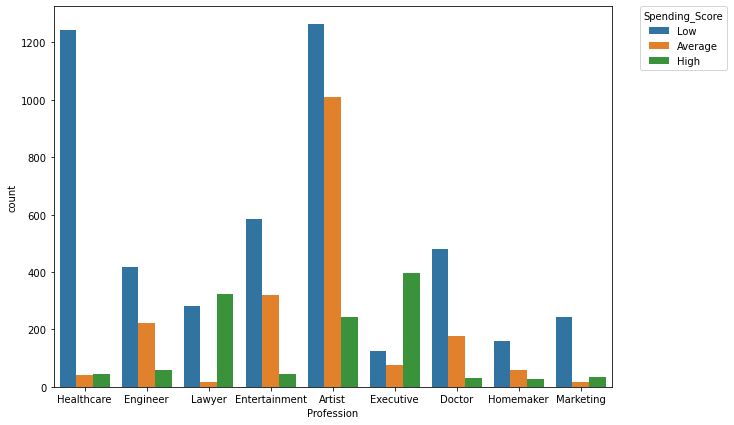

In [197]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Profession', hue='Spending_Score',data=traindata)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Spending_Score')
## Low Spending are majorly Healthcare, and Artist prodfessionals
## higher spenders are Executive, lawyers

In [198]:
traindata['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

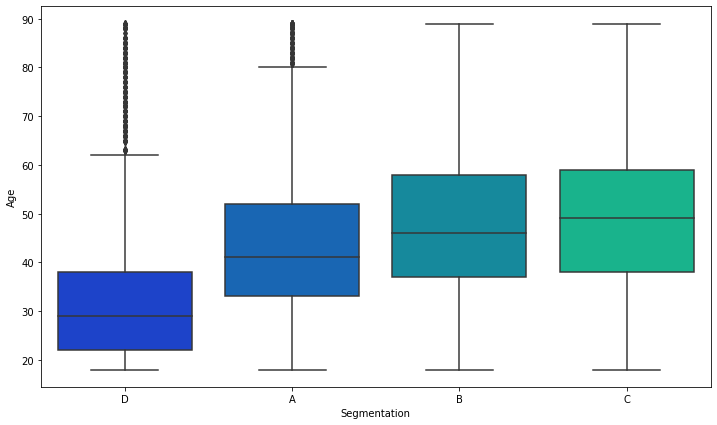

In [199]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Segmentation',y='Age',data=traindata,palette='winter')
#Segment D has most younger age groups mean=28, while C has elder age group with mean age around 47

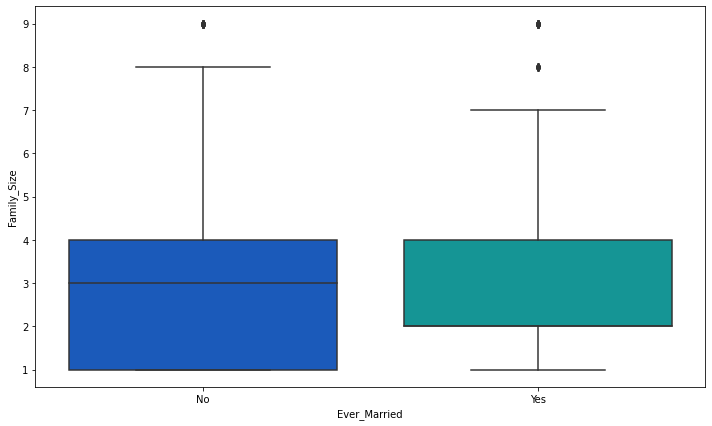

In [200]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Ever_Married',y='Family_Size',data=traindata,palette='winter')

In [201]:
train_copy  = traindata.copy()
test_copy = testdata.copy()
testIds=test_copy['ID']
train_copy['flag'] = 1
test_copy['flag'] = 0

data = pd.concat([train_copy, test_copy], axis = 0)

In [202]:
from sklearn.preprocessing import LabelEncoder
lb1 = LabelEncoder()
lb = LabelEncoder()

In [203]:
## based on above boxplot we will assume median age of 33 then not married , else married
def impute_EverMarried(cols):
    Age = cols[0]
    Ever_Married = cols[1]
    if pd.isnull(Ever_Married):
        if Age <= 33:
            return 'No'
        else:
            return 'Yes'
    else:
        return Ever_Married

## As we see Profession like Engineer, Healthcare and Marketing are more Non graduates than graduates, thats 
## how we will default  

def impute_graduate(cols):
    Graduated = cols[0]
    Profession = cols[1]
    
    if pd.isnull(Graduated):

        if Profession == "Engineer" or Profession == "Healthcare" or Profession == "Marketing" or  pd.isnull(Profession):
            return 'No'

        else:
            return 'Yes'

    else:
        return Graduated
    
    ## we will take median Work experience by profession and assign work experience
    
def impute_WorkExp(cols):
    Profession = cols[0]
    Work_Experience = cols[1]
    
    if pd.isnull(Work_Experience):
        if Profession == "Homemaker":
            return 8
        else:
            return 1
    else:
        return Work_Experience

## for profession we will look at their Spending_Score and assign Profession 
## with highest count in the spending category which is : for Average & Low - > Artist, High -> Executive

def impute_Prof(cols):
    Spending_Score = cols[0]
    Profession = cols[1]
    
    if pd.isnull(Profession):
        if Spending_Score == "Average" or Spending_Score == "Low":
            return "Artist"
        else:
            return "Executive"
    else:
        return Profession

def age_categ(x):
    if x<=25:
        return 0
    elif 26<=x<=35:
        return 1
    elif 36<=x<=45:
        return 2
    elif 46<=x<=55:
        return 4
    elif 56<=x<=65:
        return 5
    elif x>=66:
        return 6
    
    
def workexp_categ(x):
    if x==0:
        return 0
    elif x==1:
        return 1
    elif 2<=x<=7:
        return 3
    elif x>=8:
        return 4
    
def familysize_categ(x):
    if x>=5:
        return 5
    else:
        return x

In [204]:
gender_map = {
    'Male':0,
    'Female':1
}
Ever_Married = {
    'No':0,
    'Yes':1
}
grad = {
    'No':0,
    'Yes':1
}
spend_score ={
    'Low':0,
    'Average':1,
    'High':2
}
var1 ={
    'Low':0,
    'Average':1,
    'High':2
}
proff ={'Artist': 0,
 'Healthcare': 1,
 'Entertainment': 2,
 'Engineer':3,
 'Doctor': 4,
 'Lawyer': 5,
 'Executive': 6,
 'Marketing': 7,
 'Homemaker': 7}

cat_var = {'Cat_6': 1,
 'Cat_4': 2,
 'Cat_3': 3,
 'Cat_2': 4,
 'Cat_7': 5,
 'Cat_1': 6,
 'Cat_5': 7}

seg ={
    'A':0,
    'B':1,
    'C':2,
    'D':3
}
    
rev_seg ={
    0:'A',
    1:'B',
    2:'C',
    3:'D'
}

In [205]:
data['Ever_Married'] = data[['Age','Ever_Married']].apply(impute_EverMarried,axis=1)
data['Graduated'] = data[['Graduated','Profession']].apply(impute_graduate,axis=1)
data['Work_Experience'] = data[['Profession','Work_Experience']].apply(impute_WorkExp,axis=1)
data['Profession'] = data[['Spending_Score','Profession']].apply(impute_Prof,axis=1)
data.loc[data['Family_Size'].isnull(),'Family_Size']=3
data.loc[data['Var_1'].isnull(),'Var_1']='Cat_6'

data['Age'] = data['Age'].apply(age_categ)
data['Work_Experience'] = data['Work_Experience'].apply(workexp_categ)
data['Family_Size'] = data['Family_Size'].apply(familysize_categ) ## set family size>=5 to 5



In [206]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,flag
0,462809,Male,No,0,No,Healthcare,1,Low,4.0,Cat_4,D,1
1,462643,Female,Yes,2,Yes,Engineer,1,Average,3.0,Cat_4,A,1
2,466315,Female,Yes,6,Yes,Engineer,1,Low,1.0,Cat_6,B,1
3,461735,Male,Yes,6,Yes,Lawyer,0,High,2.0,Cat_6,B,1
4,462669,Female,Yes,2,Yes,Entertainment,1,High,5.0,Cat_6,A,1


In [207]:
data['Married_SpendingScore']=data['Spending_Score'] +"_"+data['Ever_Married']
data['Ever_Married_Age']=data['Age'].astype(str) +"_"+data['Ever_Married']
data['Age_SpendingScore']=data['Spending_Score'] +"_"+data['Age'].astype(str)

le = LabelEncoder()
enc = LabelEncoder().fit(data['Married_SpendingScore'])
data['Married_SpendingScore'] = enc.transform(data['Married_SpendingScore'])

enc1 = LabelEncoder().fit(data['Ever_Married_Age'])
data['Ever_Married_Age'] = enc1.transform(data['Ever_Married_Age'])

enc2 = LabelEncoder().fit(data['Age_SpendingScore'])
data['Age_SpendingScore'] = enc2.transform(data['Age_SpendingScore'])


In [208]:
data['Gender'] = data['Gender'].map(gender_map)
data['Ever_Married'] = data['Ever_Married'].map(Ever_Married)
data['Graduated'] = data['Graduated'].map(grad)
data['Profession']= data['Profession'].map(proff)
data['Spending_Score'] = data['Spending_Score'].map(spend_score)
data['Var_1'] = data['Var_1'].map(cat_var)
data['Segmentation'] = data['Segmentation'].map(seg)

In [209]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,flag,Married_SpendingScore,Ever_Married_Age,Age_SpendingScore
0,462809,0,0,0,0,1,1,0,4.0,2,3.0,1,4,0,12
1,462643,1,1,2,1,3,1,1,3.0,2,0.0,1,1,5,2
2,466315,1,1,6,1,3,1,0,1.0,1,1.0,1,5,11,17
3,461735,0,1,6,1,5,0,2,2.0,1,1.0,1,3,11,11
4,462669,1,1,2,1,2,1,2,5.0,1,0.0,1,3,5,8


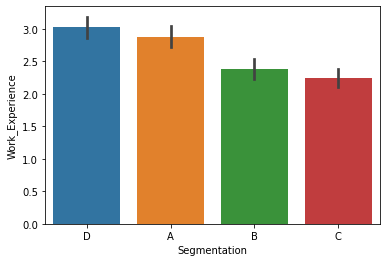

In [210]:
##sns.heatmap(train_copy.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.barplot(y=train_copy['Work_Experience'],x=train_copy['Segmentation'])

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10695 non-null  int64  
 1   Gender                 10695 non-null  int64  
 2   Ever_Married           10695 non-null  int64  
 3   Age                    10695 non-null  int64  
 4   Graduated              10695 non-null  int64  
 5   Profession             10695 non-null  int64  
 6   Work_Experience        10695 non-null  int64  
 7   Spending_Score         10695 non-null  int64  
 8   Family_Size            10695 non-null  float64
 9   Var_1                  10695 non-null  int64  
 10  Segmentation           8068 non-null   float64
 11  flag                   10695 non-null  int64  
 12  Married_SpendingScore  10695 non-null  int32  
 13  Ever_Married_Age       10695 non-null  int32  
 14  Age_SpendingScore      10695 non-null  int32  
dtypes: 

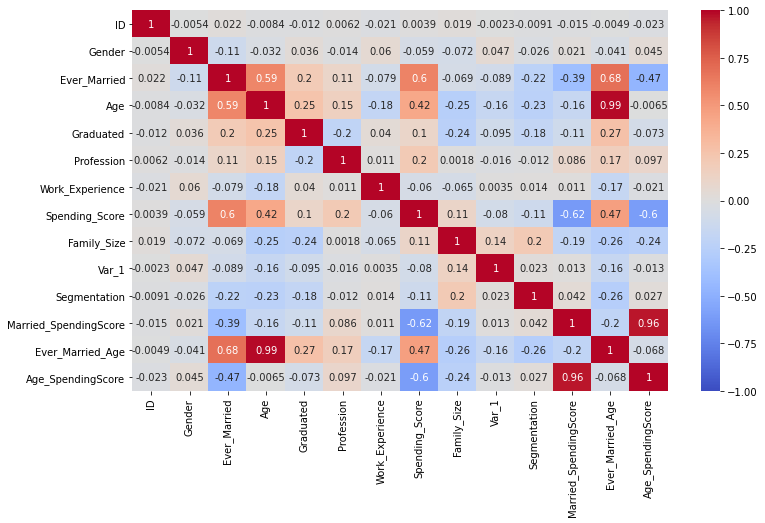

In [212]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop('flag',axis=1).corr(),annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [213]:
data.drop(['ID'], axis = 1,inplace=True)
##cat_cols=['Profession','Spending_Score','Var_1']
##data = pd.get_dummies(data, columns = cat_cols,drop_first=True)

In [214]:
train_copy = data.loc[data['flag'] == 1]
test_copy = data.loc[data['flag'] == 0]

In [215]:
#Prep train
y = train_copy['Segmentation']

X = train_copy.drop(['Segmentation'],axis=1)


In [216]:
#Prep test

Finaltest = test_copy.drop(['Segmentation'],axis=1)
Finaltest

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,flag,Married_SpendingScore,Ever_Married_Age,Age_SpendingScore
0,1,1,2,1,3,0,0,1.0,1,0,5,5,14
1,0,1,2,1,1,4,1,4.0,1,0,1,5,2
2,1,1,6,0,0,0,0,1.0,1,0,5,11,17
3,0,1,5,0,6,4,2,2.0,1,0,3,9,10
4,1,0,0,0,7,1,0,4.0,1,0,4,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,0,0,1,0,1,4,0,4.0,1,0,4,2,13
2623,1,0,1,1,4,1,0,1.0,1,0,4,2,13
2624,1,0,4,1,2,1,0,2.0,1,0,4,6,15
2625,0,1,4,1,6,1,2,5.0,2,0,3,7,9


In [217]:
from xgboost import XGBClassifier, plot_importance,plot_tree
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, RepeatedStratifiedKFold



In [218]:
Xtrain, Xtest, ytrain, ytest = train_test_split(train_copy.drop(['Segmentation'],axis=1),
                                                    train_copy['Segmentation'], test_size = 0.20)

In [219]:
clf =  XGBClassifier(random_state=101,
                    learning_rate=0.5,
                     max_depth=20,
                     eval_metric="auc",
                     objective="multi:softmax",
                     n_estimators=1000,
                     sub_sameple=0.8)

##kfold = KFold(n_splits=5, random_state=22)
#3scores = cross_val_score(clf,Xtrain,ytrue,scoring='accuracy',cv = kfold)
##print('Accuracy: {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))

In [220]:
##ypred = cross_val_predict(clf,Xtrain,ytrue,cv = kfold)

In [221]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape


((6454, 13), (1614, 13), (6454,), (1614,))

In [222]:
clf.fit(Xtrain,ytrain)
clf.score(Xtrain,ytrain)

0.8163929346141927

In [223]:
## full dataset
clf.score(X,y)
##ypred=clf.predict(Xtest)
##accuracy_score(ytrue, ypred, normalize=False)

0.7473971244422409

<Figure size 864x504 with 0 Axes>

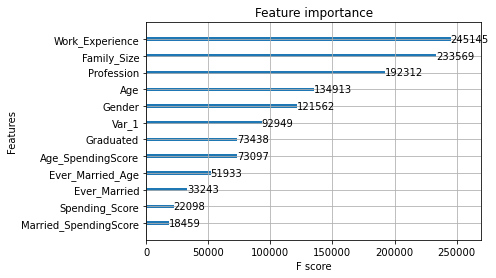

In [224]:
plt.figure(figsize=(12, 7))
plot_importance(clf)
plt.show()

In [225]:
ypred=clf.predict(Xtrain)
print(classification_report(ytrain, ypred

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      1582
         1.0       0.77      0.72      0.75      1462
         2.0       0.78      0.83      0.80      1578
         3.0       0.88      0.89      0.89      1832

    accuracy                           0.82      6454
   macro avg       0.81      0.81      0.81      6454
weighted avg       0.82      0.82      0.82      6454



ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

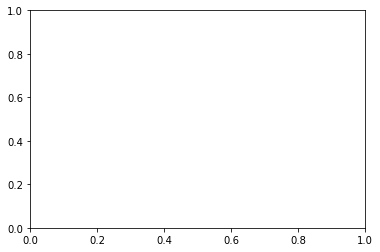

In [243]:
plot_tree(clf)
plt.show()

In [227]:
##print('Accuracy: {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))

In [228]:
preds=clf.predict(Finaltest)
preds

array([0., 2., 2., ..., 0., 1., 3.])

In [229]:
result=pd.DataFrame({'ID':testIds,'Segmentation':preds})
result['Segmentation'] = result['Segmentation'].map(rev_seg)

result.to_csv("C:\\Users\\v-jivya\\OneDrive - Microsoft\\Brillio\\DataScienceProject\\Predicts\\result_v1.csv",index=False)
result

,ID,Segmentation
0,458989,A
1,458994,C
2,458996,C
3,459000,C
4,459001,D
...,...,...
2622,467954,D
2623,467958,B
2624,467960,A
2625,467961,B


In [230]:
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 22)


In [231]:
n_scores = cross_val_score(model, Xtrain, ytrain, scoring = 'accuracy', cv = cv, n_jobs = -1, error_score = 'raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit( Xtrain, ytrain)
# make a single prediction
yhat = (model.predict(Finaltest)).ravel()
print('Prediction: ', yhat)

Accuracy: 0.513 (0.022)
Prediction:  [0. 2. 2. ... 0. 1. 3.]


In [237]:
test_copy['Segmentation']=preds
test_copy['Segmentation'] = test_copy['Segmentation'].map(rev_seg)
test_copy.head()
testdata['Segmentation'] = test_copy['Segmentation']

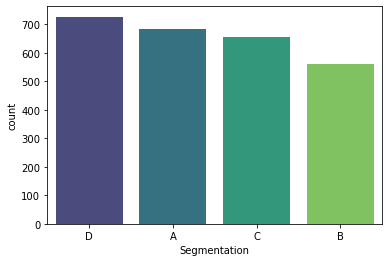

In [233]:
sns.countplot(x='Segmentation',data=test_copy,palette='viridis',order=test_copy['Segmentation'].value_counts().index)

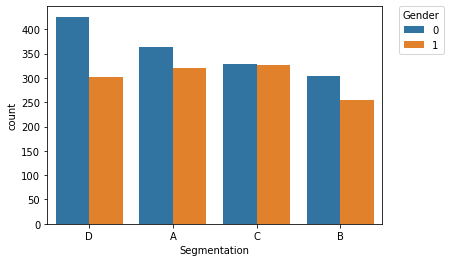

In [234]:
sns.countplot(x='Segmentation', hue='Gender',data=test_copy,order=test_copy['Segmentation'].value_counts().index)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Gender')

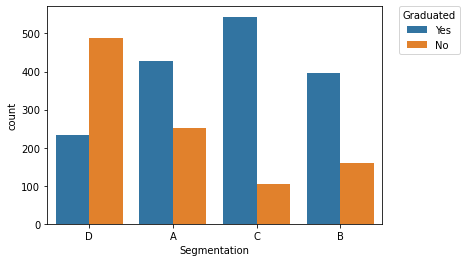

In [241]:
sns.countplot(x='Segmentation', hue='Graduated',data=testdata,order=testdata['Segmentation'].value_counts().index)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,title='Graduated')

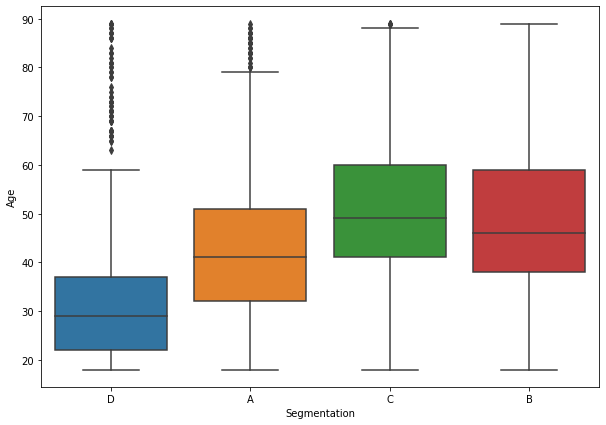

In [238]:
plt.figure(figsize=(10, 7))
sns.boxplot(y='Age',x='Segmentation',data=testdata,order=testdata['Segmentation'].value_counts().index)